In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# DEBUG_MODE=True

In [8]:
business_df=pd.read_csv("C:/Users/Sharon/datacode/Class-Projects/ATL-Foodie/static/Resources/yelp_atl_restaurants_csv.csv")
# if DEBUG_MODE==True:
#     business_df=business_df[:1000]
business_df.head(2)

,Unnamed: 0,Unnamed: 0.1,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,0,62,z8-_6l5EhX5NuPfWzJYQMA,Great Wraps,3393 Peachtree Rd NE,Atlanta,GA,30326,33.846335,-84.363578,3.0,11,1,"{'RestaurantsGoodForGroups': 'False', 'GoodFor...","Food, Restaurants, Cheesesteaks, Sandwiches, J...","{'Monday': '7:0-21:0', 'Tuesday': '7:0-21:0', ..."
1,1,86,Q2vefh0tGhtCGQDK1FI7cw,Piece of Cake,3215 Roswell Rd NE,Atlanta,GA,30305,33.842875,-84.378539,4.0,231,1,"{'BikeParking': 'True', 'BusinessParking': ""{'...","Restaurants, Patisserie/Cake Shop, Desserts, F...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-17:0', ..."


In [ ]:
# business_df.to_csv("yelp_business_test.csv")

In [10]:
atl_restaurants_df = business_df.drop(['Unnamed: 0'], axis=1).drop(['Unnamed: 0.1'], axis=1)
atl_restaurants_df.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,z8-_6l5EhX5NuPfWzJYQMA,Great Wraps,3393 Peachtree Rd NE,Atlanta,GA,30326,33.846335,-84.363578,3.0,11,1,"{'RestaurantsGoodForGroups': 'False', 'GoodFor...","Food, Restaurants, Cheesesteaks, Sandwiches, J...","{'Monday': '7:0-21:0', 'Tuesday': '7:0-21:0', ..."
1,Q2vefh0tGhtCGQDK1FI7cw,Piece of Cake,3215 Roswell Rd NE,Atlanta,GA,30305,33.842875,-84.378539,4.0,231,1,"{'BikeParking': 'True', 'BusinessParking': ""{'...","Restaurants, Patisserie/Cake Shop, Desserts, F...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-17:0', ..."


In [11]:
atl_restaurants_df.dtypes

business_id      object
name             object
address          object
city             object
state            object
postal_code       int64
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
attributes       object
categories       object
hours            object
dtype: object

In [12]:
atl_restaurants_df.describe()

,postal_code,latitude,longitude,stars,review_count,is_open
count,4893.000000,4893.000000,4893.000000,4893.000000,4893.000000,4893.000000
mean,30274.932557,33.813942,-84.369608,3.438381,139.349888,0.639894
std,103.709408,0.071045,0.065896,0.784166,243.524167,0.480080
min,30002.000000,33.622064,-84.542470,1.000000,5.000000,0.000000
25%,30305.000000,33.762535,-84.403281,3.000000,19.000000,0.000000
50%,30314.000000,33.806276,-84.377577,3.500000,55.000000,1.000000
75%,30329.000000,33.877485,-84.329888,4.000000,159.000000,1.000000
max,30363.000000,33.949866,-84.200206,5.000000,3861.000000,1.000000


In [13]:
print("The average review is ", atl_restaurants_df['stars'].mean(), " stars.")
print("The average review count is ", atl_restaurants_df['review_count'].mean(), ".")

The average review is  3.438381361128142  stars.
The average review count is  139.34988759452278 .


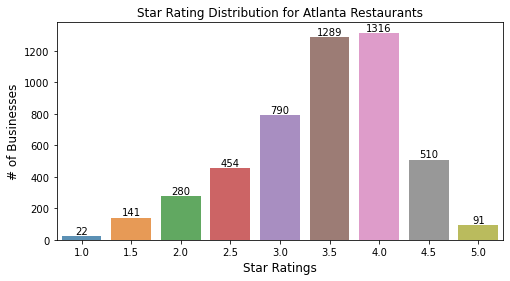

In [14]:
# Get the distribution of the ratings
x=atl_restaurants_df['stars'].value_counts()
x=x.sort_index()

#plot
plt.figure(figsize=(8,4))
ax=sns.barplot(x=x.index, y=x.values, alpha=0.8)
plt.title("Star Rating Distribution for Atlanta Restaurants")
plt.ylabel('# of Businesses', fontsize=12)
plt.xlabel('Star Ratings', fontsize=12)

#adding the text labels
rects=ax.patches
labels=x.values 
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va= 'bottom')

plt.show()


In [22]:
rest_stars_df=pd.read_csv("/Users/Sharon/datacode/Class-Projects/ATL-Foodie/static/Resources/categories.csv").drop(['Unnamed: 0'], axis=1)
rest_stars_df

,Category
0,Sandwiches
1,Bakeries
2,Chinese
3,Caribbean
4,Pizza
5,Mediterranean
6,Greek
7,Italian
8,Southern
9,Mexican


In [23]:
# List the categories in descending order
atl_restaurants_df.groupby('categories').size().sort_values(ascending=False)

categories
Restaurants, Mexican                                                                                     61
Restaurants, Pizza                                                                                       61
Mexican, Restaurants                                                                                     59
Chinese, Restaurants                                                                                     59
Restaurants, Chinese                                                                                     52
                                                                                                         ..
Restaurants, Burgers, American (Traditional), Mediterranean, Halal, Sandwiches, Greek, Middle Eastern     1
Restaurants, Burgers, American (New), Nightlife, Bars, Cafes, Cocktail Bars, Mexican                      1
Restaurants, Burgers, American (New), American (Traditional)                                              1
Restaurants, Buff

## Visualize the Top Categories 

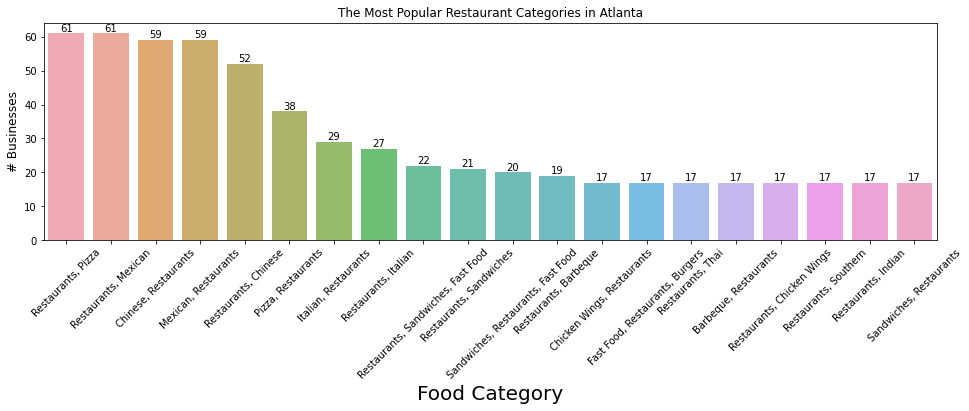

In [24]:
# Creating x value of the column categories and inclusde counts for y value
x=atl_restaurants_df['categories'].value_counts()
x=x.sort_values(ascending=False)
x=x.iloc[0:20]
plt.figure(figsize=(16,4))
ax=sns.barplot(x=x.index, y=x.values, alpha=0.8)
plt.title("The Most Popular Restaurant Categories in Atlanta")
locs, labels =plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel("# Businesses", fontsize =12)
plt.xlabel("Food Category", fontsize=20)

# adding the text labels
rects = ax.patches
labels=x.values
for rect, label in zip(rects, labels):
    height=rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va="bottom")
plt.show()